5.**[25 points] Locally weighted linear regression**

(a) i.
\begin{equation*}
  X = \begin{bmatrix}
       - (x^{(1)})^T - \\
       \vdots \\
       - (x^{(m)})^T - \\
       \end{bmatrix}
       \in \mathbb{R}^{m \times n}
  \qquad
  y = \begin{bmatrix}
       y^{(1)} \\
       \vdots \\
       y^{(m)} \\
       \end{bmatrix}
\end{equation*}
So 
\begin{equation*}
  X\theta-y = \begin{bmatrix}
    \theta^Tx^{(1)}-y^{(1)} \\
    \vdots \\
    \theta^Tx^{(m)}-y^{(m)} \\
    \end{bmatrix}
  \quad
  \Longrightarrow
  \quad
  W = \frac{1}{2} \mathrm{diag} (w^{(i)}, \dots , w^{(m)})
\end{equation*}

ii. 
\begin{align*}
J(\theta) &= (\theta^TX^T-y^T)W(X\theta-y) \\
          &= \theta^TX^TWX\theta -\theta^TX^TWy-y^TWX\theta+y^TWy \\
          &= \theta^TX^TWX\theta -2y^TWX\theta+y^TWy
\end{align*}
Take derivative w.r.t $\theta$ and set it to $0$:
\begin{equation*}
\nabla_{\theta} J(\theta) = 2 X^TWX\theta-2X^TWy = 0 \ \Longleftrightarrow \ \theta = (X^TWX)^{-1}X^TWy
\end{equation*}

iii. The maximum likelihood $l(\theta)$:
\begin{align*}
l(\theta) &= \sum_{i=1}^m \log{p(y^{(i)}|x^{(i)};\theta)} \\
          &= \sum_{i=1}^m \log{\frac{1}{\sqrt{(2\pi)}\sigma^{(i)}}}-\sum_{i=1}^m \frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2} \\
\end{align*}
Then maximizing $l(\theta)$ is equivalent to minimizing $\sum_{i=1}^m \frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2} = \frac{1}{2} \sum_{i=1}^m w^{(i)} (y^{(i)}-\theta^Tx^{(i)})^2$,
so $w^{(i)} = \frac{1}{(\sigma^{(i)})^2}$.


(b)

Define `LocallyWeightedLinearRegression`

In this case, $h_\theta(x) = \theta^Tx$, and we want to find $\theta$.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

from src.linear_model import LinearModel
class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***
        self.x = x
        self.y = y
        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***
        m,n = x.shape
        y_pred = np.zeros(m)
        for i in range(m):
            W = np.diag(np.exp(-np.linalg.norm(self.x-x[i],axis=1)**2/(2*self.tau*self.tau)))
            y_pred[i] = x[i] @ np.linalg.inv(self.x.T @ W @ self.x) @ self.x.T @ W @ self.y

        return y_pred

        # *** END CODE HERE ***

Define `main` and run:

MSE=0.3305312682137524


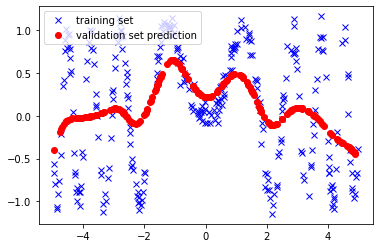

In [10]:
def main(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)

    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Fit a LWR model
    # Get MSE value on the validation set
    # Plot validation predictions on top of training set
    # No need to save predictions
    # Plot data

    lwr = LocallyWeightedLinearRegression(tau=0.5)
    lwr.fit(x_train,y_train)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_eval_pred = lwr.predict(x_eval)

    MSE = np.mean((y_eval-y_eval_pred)*(y_eval-y_eval_pred))
    print(f"MSE={MSE}")

    plt.plot(x_train[:,-1], y_train, 'bx', label="training set")
    plt.plot(x_eval[:,-1], y_eval_pred, 'ro', label="validation set prediction")
    plt.legend(loc="upper left")
    plt.show()
    # *** END CODE HERE ***
if __name__ == "__main__":
    tau=5e-1
    train_path='./data/ds5_train.csv'
    eval_path='./data/ds5_valid.csv'
    main(tau,train_path,eval_path)

This is underfitting.

(c) Define `main` and run:

0-th: MSE=0.018096163123598515
1-th: MSE=0.01240007615046478
2-th: MSE=0.024224589379800317
3-th: MSE=0.3305312682137524
4-th: MSE=0.40009594801808596
5-th: MSE=0.4337439227232362
The perfect tau is: 0.05


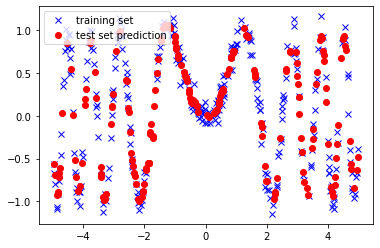

In [11]:
def main(tau_values, train_path, valid_path, test_path, pred_path):
    """Problem 5(b): Tune the bandwidth paramater tau for LWR.

    Args:
        tau_values: List of tau values to try.
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Search tau_values for the best tau (lowest MSE on the validation set)
    # Fit a LWR model with the best tau value
    # Run on the test set to get the MSE value
    # Save predictions to pred_path
    # Plot data

    x_eval, y_eval = util.load_dataset(valid_path, add_intercept=True)
    MSE = np.zeros(len(tau_values))
    for i,tau in enumerate(tau_values):
        lwr = LocallyWeightedLinearRegression(tau)
        lwr.fit(x_train,y_train)
        y_eval_pred = lwr.predict(x_eval)
        MSE[i] = np.mean((y_eval-y_eval_pred)*(y_eval-y_eval_pred))
        print(f"{i}-th: MSE={MSE[i]}")
    tau_perfect = tau_values[np.argmin(MSE)]
    print(f"The perfect tau is: {tau_perfect}")

    x_test, y_test = util.load_dataset(test_path, add_intercept=True)
    lwr = LocallyWeightedLinearRegression(tau_perfect)
    lwr.fit(x_train,y_train)
    y_test_pred = lwr.predict(x_test)
    np.savetxt(pred_path,y_test_pred)

    plt.plot(x_train[:,-1], y_train, 'bx', label="training set")
    plt.plot(x_test[:,-1], y_test_pred, 'ro', label="test set prediction")
    plt.legend(loc="upper left")
    plt.show()
    # *** END CODE HERE ***
if __name__ == "__main__":
    tau_values=[3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]
    train_path='./data/ds5_train.csv'
    valid_path='./data/ds5_valid.csv'
    test_path='./data/ds5_test.csv'
    pred_path='./output/p05c_pred.txt'
    main(tau_values,train_path,valid_path,test_path,pred_path)